<a href="https://colab.research.google.com/github/21PA1A6132/3-2_DL_LAB/blob/main/Experiment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras import models,layers,datasets
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [8]:
y_train=y_train.reshape(-1)

In [5]:
classes = ['airplane','automobile','ship','truck','cat','dog','deer','bird','frog','horse']

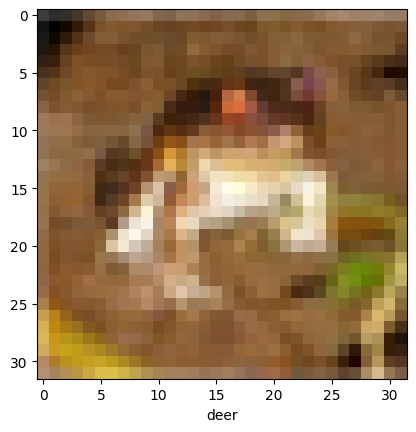

In [10]:
def plotsample(x,y,index):
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

plotsample(x_train,y_train,0)

In [12]:
x_train=x_train/255
x_test=x_test/255

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters =32,kernel_size = (3,3),activation='relu',input_shape = (32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters = 32 ,kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
hist=cnn.fit(x_train,y_train,epochs=10,validation_data = (x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1301 - accuracy: 0.6061 - val_loss: 1.0979 - val_accuracy: 0.6160
Epoch 2/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0272 - accuracy: 0.6436 - val_loss: 1.0578 - val_accuracy: 0.6299
Epoch 3/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9561 - accuracy: 0.6687 - val_loss: 0.9910 - val_accuracy: 0.6537
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9034 - accuracy: 0.6857 - val_loss: 0.9530 - val_accuracy: 0.6673
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8599 - accuracy: 0.7015 - val_loss: 0.9556 - val_accuracy: 0.6684
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8194 - accuracy: 0.7133 - val_loss: 0.9500 - val_accuracy: 0.6742
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7880 - accuracy: 0.7248 - val_loss: 0.9084 -

In [19]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

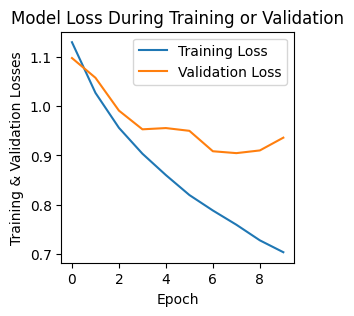

In [20]:
plt.figure(figsize=(3,3),dpi=100)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])

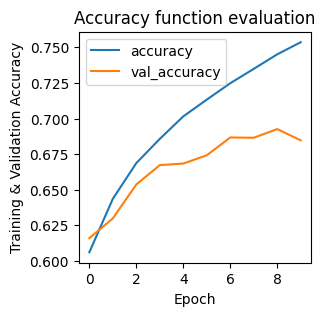

In [24]:
plt.figure(figsize=(3,3),dpi=100)
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.title("Accuracy function evaluation")
plt.ylabel('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()